In [1]:
import razor.flow as rf
from razor import api
import logging
import os, time
import typing as typ
import numpy as np
import pandas as pd

logger = logging.getLogger()


In [2]:
from razor.project.blocks.adapter_atomic_new import STDIn
from razor.project.blocks.adapter_atomic_new import STDOut

In [3]:
def project_space_path(path):
    ps = api.datasources('Project Space')
    return os.path.join(ps.abspath(), path)


In [4]:
def drop_col(df):
    return df.drop(['x_temp'], axis=1)

# @rf.block
# class STDIn:
#     filename: str
#     out_ds: rf.Output[typ.Any]

#     def run(self):
#         df = pd.read_parquet(project_space_path(self.filename))

#         df['x_temp'] = np.nan
#         logger.info(df.head())
#         self.out_ds.put(df)


# @rf.block
# class STDOut:
#     in_ds: typ.Any
#     out_filename: str

#     def run(self):
#         logger.info(self.in_ds.shape)
#         self.in_ds.to_parquet(project_space_path(self.out_filename), index=False)
        

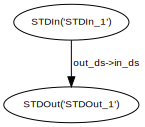

In [5]:
config = {'cores': 1, 'ram': 4096}

size = '10MB'
ip_filename = project_space_path("sdk_testbench/input_data/dummy_"+size+"_df.parquet")
op_filename = project_space_path("sdk_testbench/output_data/tc_09.parquet")

std_in = STDIn(filename=ip_filename)
# std_in.executor = rf.ContainerExecutor(cores=config['cores'], memory=config['ram'])
std_in.out_ds = rf.Output.set(adapter=drop_col)

std_out = STDOut(in_ds=std_in.out_ds, out_filename=op_filename)
# std_out.executor = rf.ContainerExecutor(cores=config['cores'], memory=config['ram'])

pipeline = rf.Pipeline(name='adapter_atomic_socket_transport', targets=[std_out])
pipeline

In [6]:
pipeline.execute()

<Process(Pipeline Manager('adapter_atomic_socket_transport'), stopped)>